## Classification Types

### Binary Classification.
- Will customer buy Life insurance?
  - Yes
  - No


### Multiclass Classification
- Which party a person is going to vote for?
  - Democratic
  - Independent
  - Republician 

### The problem we are going to solve today is recognize handwritten digits.

In [2]:
# Libraries and dataset

import matplotlib.pyplot as plt


# dataset is already inside sklearn library, I am just loding it for my use-case.
from sklearn.datasets import load_digits


In [3]:
# load the dataset
digits = load_digits()

# Let's see what traininig set contains.
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# Lets see what first index of data contains

digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

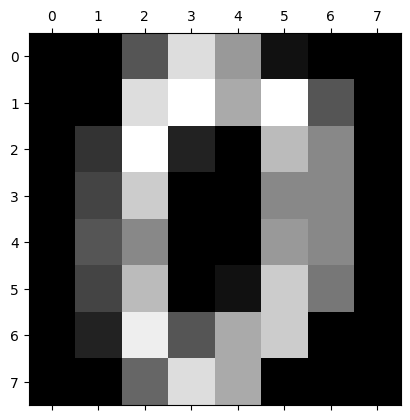

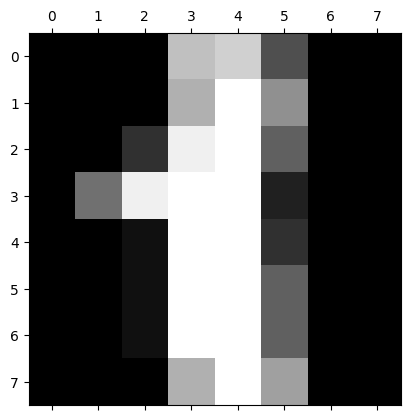

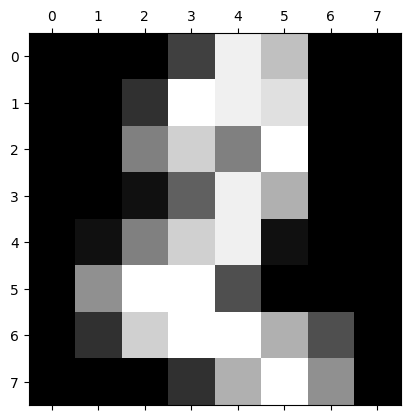

In [10]:
# lets print the first three sample images.
plt.gray()

for i in range(3):
    plt.matshow(digits.images[i])

In [17]:
#  Let's see whats inside target and target_name

print(digits.target[0:5]) # Target digit upto five
print(digits.target_names[5:]) # Target digit after five


[0 1 2 3 4]
[5 6 7 8 9]


So, target and target_names simply contains our index number.

In [20]:
# x is independent and y is dependent variable

x = digits['data']
y = digits.target



In [21]:
# libraries
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [26]:
print(f'The 80% of all available sample in our dataset {len(x_train)}')

The 80% of all available sample in our dataset 1437


In [27]:
print(f'The 20% of all available sample in our dataset for test {len(x_test)}')

The 20% of all available sample in our dataset for test 360


In [29]:
# logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train) #X_train has hand_written characters and y_train has the correspondin outputs

/home/ubuntu/100DaysOfCoding/100Venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

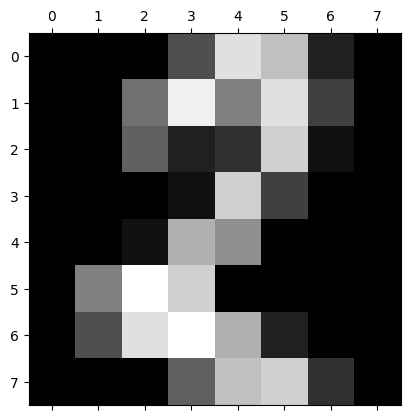

In [40]:
# Random image for test
plt.matshow(digits.images[50])

- The digit looks like 2
- Lets see if we can get it right or not in the cell below.

In [42]:
model.predict([digits.data[50]])

array([2])

We got it right, our model is working fine

In [43]:
# Accuracy
model.score(x_test, y_test)

0.9444444444444444

Accuracy is more than 90% which is pretty good.

Our model is giving the exact prediction but why my accuracy is 0.944 instead of 1.

If you want to know where did i fail, one of the way is doing that is confusion matrix

## Confusion Matrix

In [44]:
y_pred = model.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix

cm = (y_test, y_pred) #y_test is our actual value and y_pred is our prediction.
cm

(array([4, 0, 9, 1, 4, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 4, 6, 2, 7, 4, 6,
        4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7,
        9, 6, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 4, 4, 7,
        3, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
        6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
        4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 9, 1,
        0, 3, 4, 3, 0, 9, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
        2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0,
        4, 0, 0, 4, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 1, 5,
        2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 3, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
        9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
        8, 7, 3, 7, 8, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
        5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6,
        2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 

To visualize the confusion matrix

Text(95.72222222222221, 0.5, 'Truth')

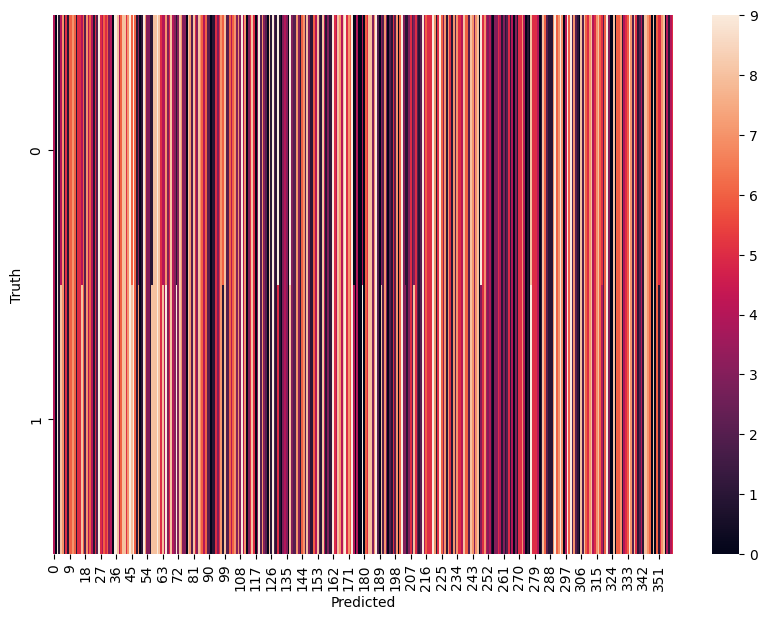

In [48]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Truth')